#dataset link:-https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil?select=amazon.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('amazon.xls',encoding="iso-8859-1",parse_dates=['date'])

In [3]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [5]:
#1.Datatypes Top 5 rows data

In [6]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [7]:
#2. Display last 5 rows

In [8]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [9]:


#3.FInd shape of our dataset

In [10]:
data.shape

(6454, 5)

In [11]:
print("No. of Rows:-",data.shape[0])
print("No. of Columns:-",data.shape[1])

No. of Rows:- 6454
No. of Columns:- 5


In [12]:
#Get Information of the Dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [14]:
#5.Check Duplicates Data and Drop Them

In [15]:
dup_data=data.duplicated().any()

In [16]:
print("Are There Dupicates",dup_data)

Are There Dupicates True


In [17]:
data= data.drop_duplicates()

In [18]:
data.shape

(6422, 5)

In [19]:
6454-6422

32

In [20]:
#6.Check Null Values In The Dataset

In [21]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [22]:
#Get Overall Statistics About The Data Frame

In [23]:
#8.Rename Month Name to English

In [24]:
data['month_new']=data['month'].map({'Janeiro':'jan',
                                    'Fevereiro':'feb',
                                    'Março':'march',
                                    'Abril':'april',
                                    'Maio':'may',
                                    'Junho':'june',
                                    'Julho':'july',
                                    'Agosto':'august',
                                    'Setembro':'sep',
                                    'Octubro':'oct',
                                    'Novembro':'nov',
                                    'Dezembro':'dec'})

C:\Users\Admin\AppData\Local\Temp\ipykernel_7368\2954672587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_new']=data['month'].map({'Janeiro':'jan',


In [25]:
print(pd.__version__)


2.2.3


In [26]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [27]:
#9.Total Number Of fires Background

In [28]:
data.shape

(6422, 6)

In [29]:
#10.In which Month Maximum Number Of forest fires were reported

In [30]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [31]:
data1=data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,june,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


In [32]:
data['number'] =data['number'].replace('.','',regex=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7368\2518333540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['number'] =data['number'].replace('.','',regex=True)


In [33]:
data['number'] =data['number'].replace('.','',regex=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7368\2518333540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['number'] =data['number'].replace('.','',regex=True)


<Axes: xlabel='month_new', ylabel='number'>

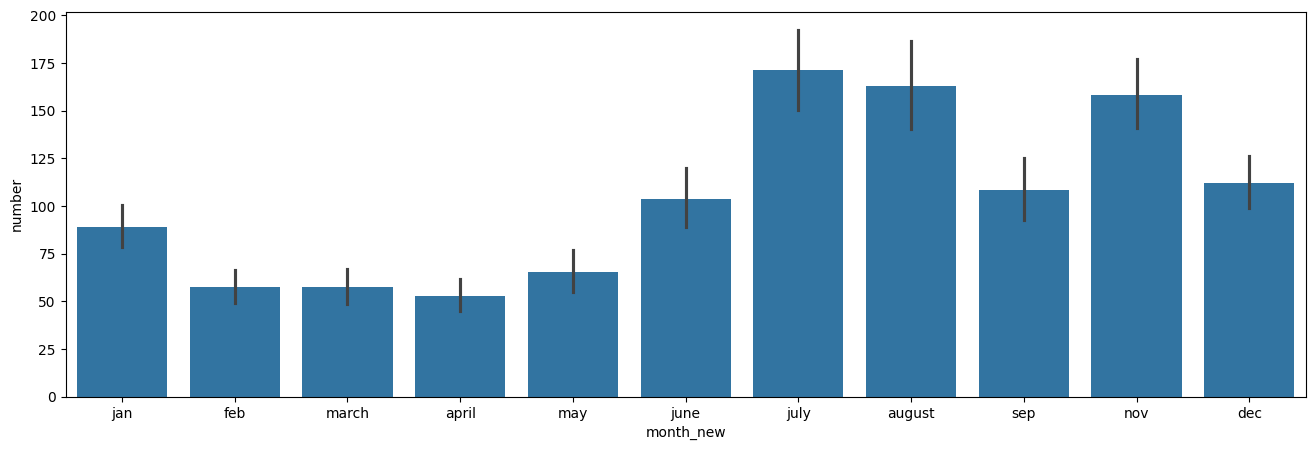

In [34]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=data)

In [35]:
#11.In which year maximum number of forest fires were reported?

In [36]:
data2=data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

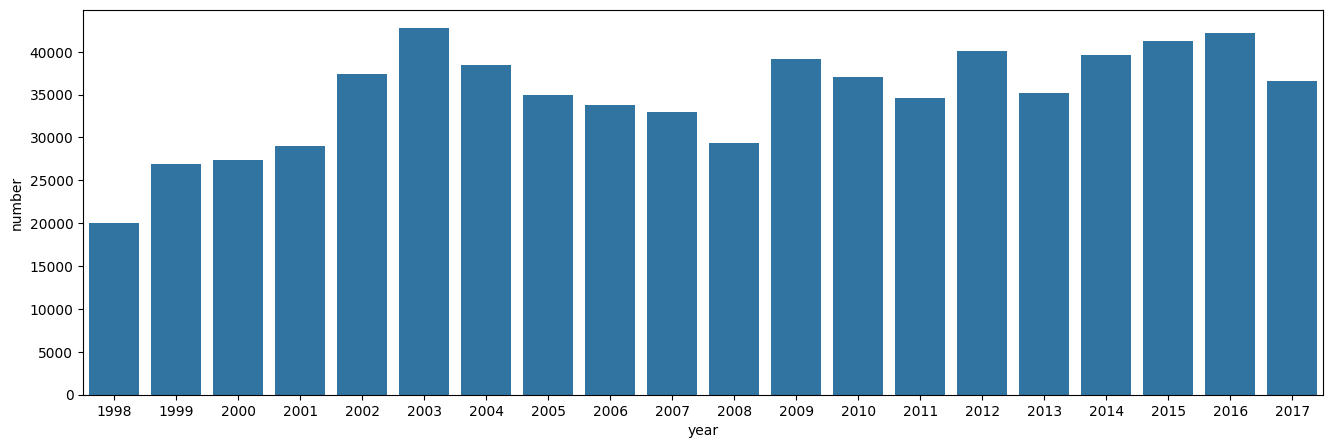

In [37]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data2)

## In which State Maximum Forest Fires Are Reported

In [38]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [39]:
data3=data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


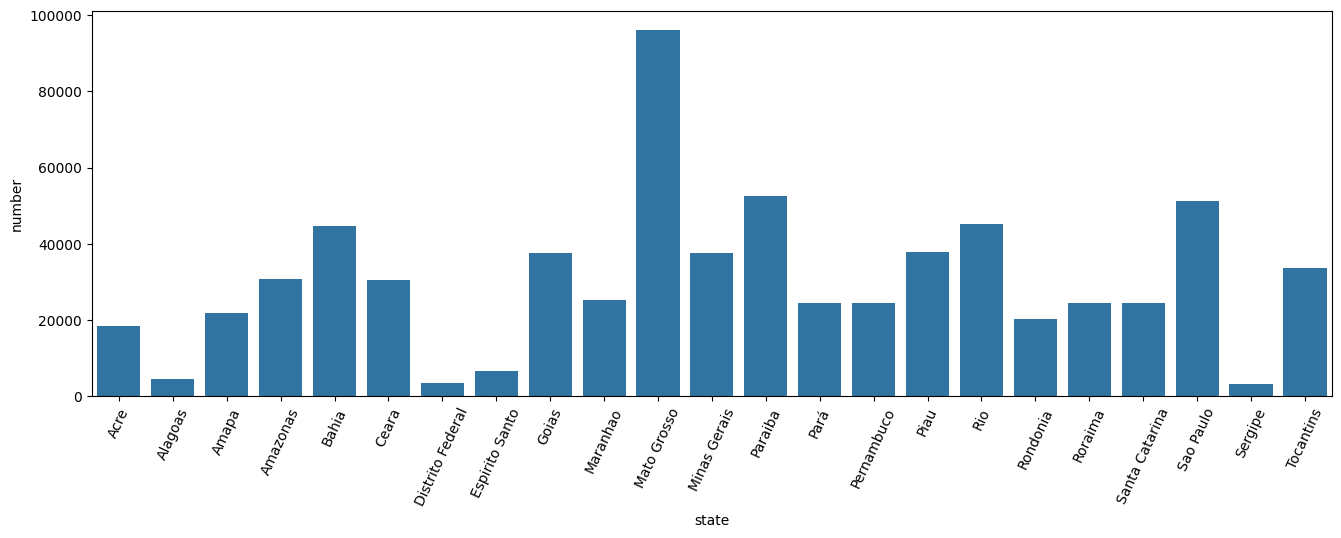

In [40]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data3)
plt.xticks(rotation=65)
plt.show()

In [41]:
#13.Find Total number of forest fires were reported in amazons

In [42]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [43]:
data[data['state']=="Amazonas"]['number'].sum()

np.float64(30650.129)

In [44]:
#14.Display number of fires were reported in amazonas (year-wise)

In [45]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [46]:
data4=data[data['state']=="Amazonas"]
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Figure size 1600x500 with 0 Axes>

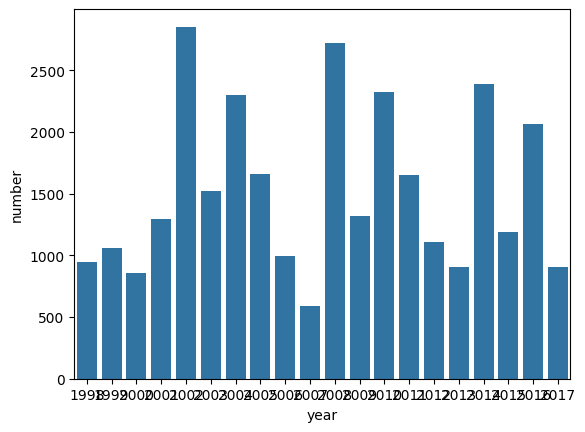

<Figure size 1600x500 with 0 Axes>

In [47]:
sns.barplot(x='year',y='number',data=data5)
plt.figure(figsize=(16,5))


In [48]:
#15.Display number of fires were reported in amazonas(Day-Wise)

In [49]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [50]:
data6=data[data['state']=="Amazonas"]

In [51]:
day=data6.groupby(data6['date'].dt.dayofweek).number

In [52]:
print(data6.dtypes)


year                  int64
state                object
month                object
number              float64
date         datetime64[ns]
month_new            object
dtype: object


In [53]:
print(data6['date'].dtype)


datetime64[ns]


In [56]:
day=data6.groupby(data6['date'].dt.dayofweek).number
import calendar
day_index = [calendar.day_name[x] for x in range(0,7)]


In [ ]:
#16.Find TOtal Number Of fires Were reported in 2015 and visualize data based on each 'month' 

In [58]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [64]:
fire =data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()

In [65]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,june,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='month_new', ylabel='number'>

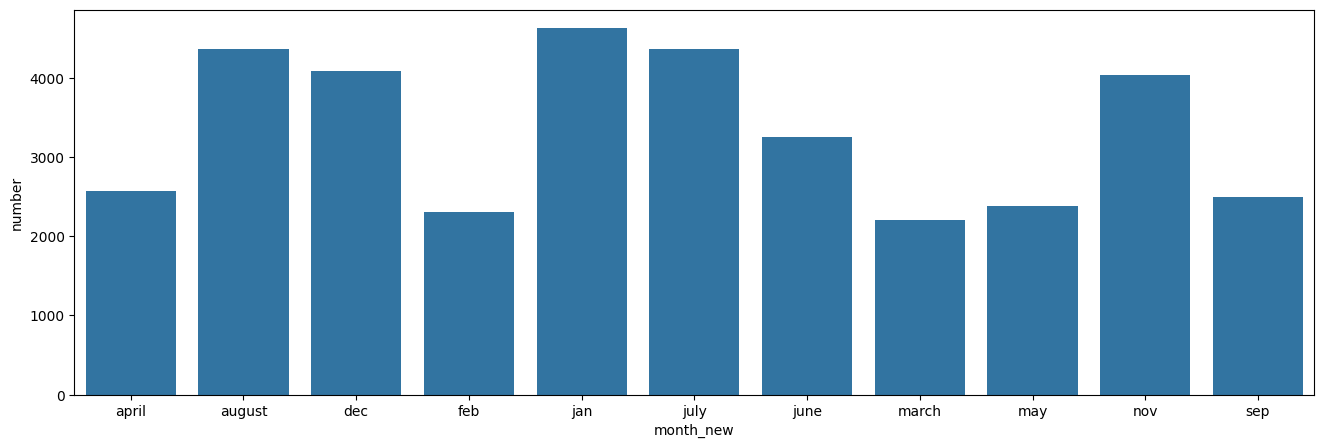

In [67]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=fire)

In [68]:
#17.FInd average number of fires were reported fom highest to lowest to lowest (state-wise)

In [72]:
data8= data.groupby('state')['number'].mean ().sort_values(ascending=False).reset_index()

In [73]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


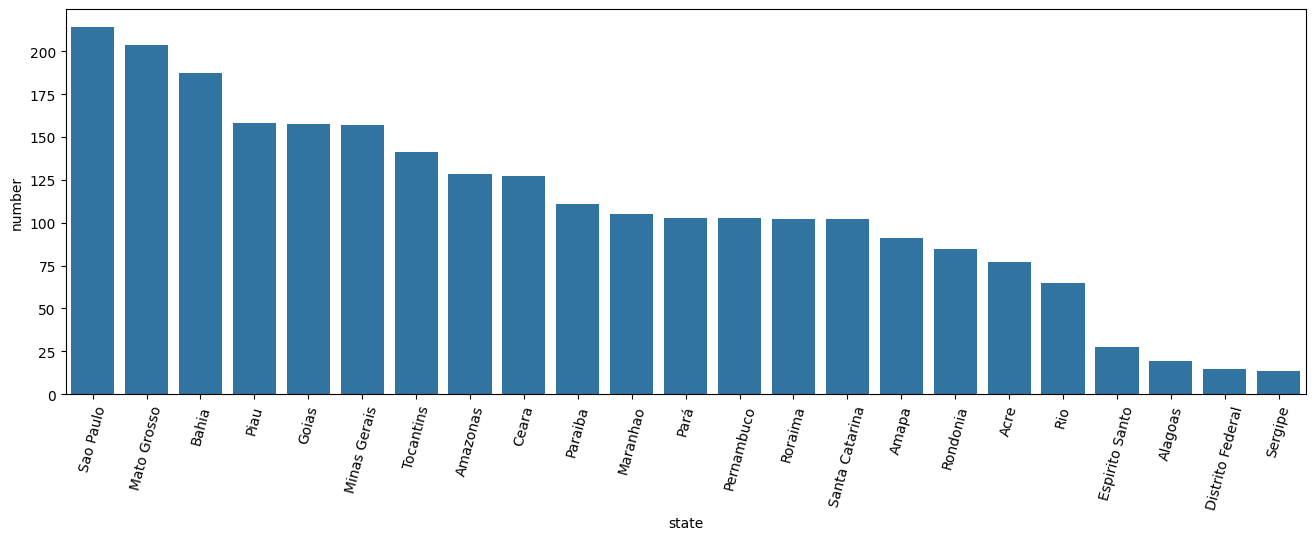

In [76]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data8)
plt.xticks(rotation=75)
plt.show()

In [77]:
#18.To find the state names where fires were  reported in 'dec' month

In [78]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [82]:
data[data['month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)